In [66]:
%matplotlib inline

In [11]:
import sys, imp, os
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml

from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view
import backtesting as bt


In [10]:
del sys.modules['tools.display']

In [9]:
del sys.modules['tools.instruments']
del sys.modules['tools.quotes']
del sys.modules['backtesting']
del sys.modules['backtesting.trader']
del sys.modules['backtesting.system']

In [27]:
with open('backtesting/system1.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'tf05', 'description': '시스템 설명', 'quotes_style': 'bo', 'instruments': None, 'from_date': '2000-01-01', 'to_date': None, 'principal': 100000, 'heat_system': 0.05, 'heat_sector': None, 'heat_trade': 0.01, 'max_lots': 3, 'commission': 2.99, 'skid': 0.25, 'indicators': [['ATR', 'window=30'], ['MIN', 'window=20'], ['MAX', 'window=20']], 'entry_rule': {'long': None, 'short': None}, 'exit_rule': {'long': None, 'short': None}, 'stop_rule': {'long': 'min20 > close', 'short': 'max20 > high'}}


In [28]:
trader = bt.Trader(quotes_style='bo', systems=system1)

In [29]:
system = trader.systems[0]

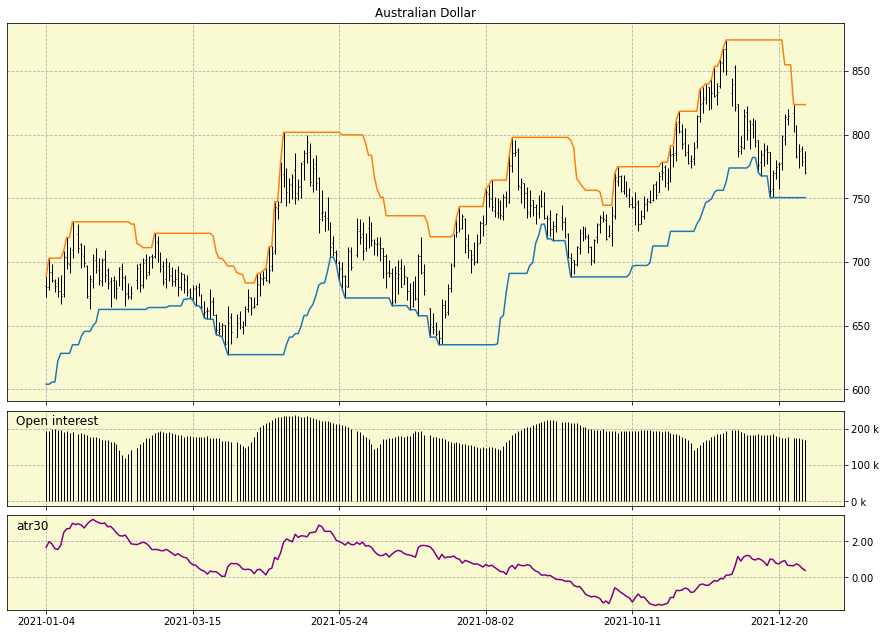

In [33]:
del sys.modules['tools.display']
from tools.display import ohlc_chart, view


quotes = trader.quotes['W']['2021-01-01':'2022-01-01']
indicators = system.quotes['W']['2021-01-01':'2022-01-01']
#m = quotes.MAX(window=20)
fig = view(quotes,indicators=indicators, size=(15,9), title='Australian Dollar')
plt.subplots_adjust(wspace=0, hspace=0.05)

In [28]:
indicators['atr30'].min()

0.003842252160496253

In [6]:
atr = system.quotes['AD']['atr30']

In [8]:
atr.max()

7.602463876946213

In [10]:
(atr - atr.rolling(window=200, min_periods=1).mean())/atr.rolling(window=200, min_periods=1).std()

date
2020-01-02         NaN
2020-01-03    0.707107
2020-01-06    0.166833
2020-01-07    1.422227
2020-01-08    0.947424
                ...   
2021-05-26   -0.706582
2021-05-27   -1.072732
2021-05-28   -1.020364
2021-05-31   -1.016373
2021-06-01   -0.981949
Name: atr30, Length: 366, dtype: float64

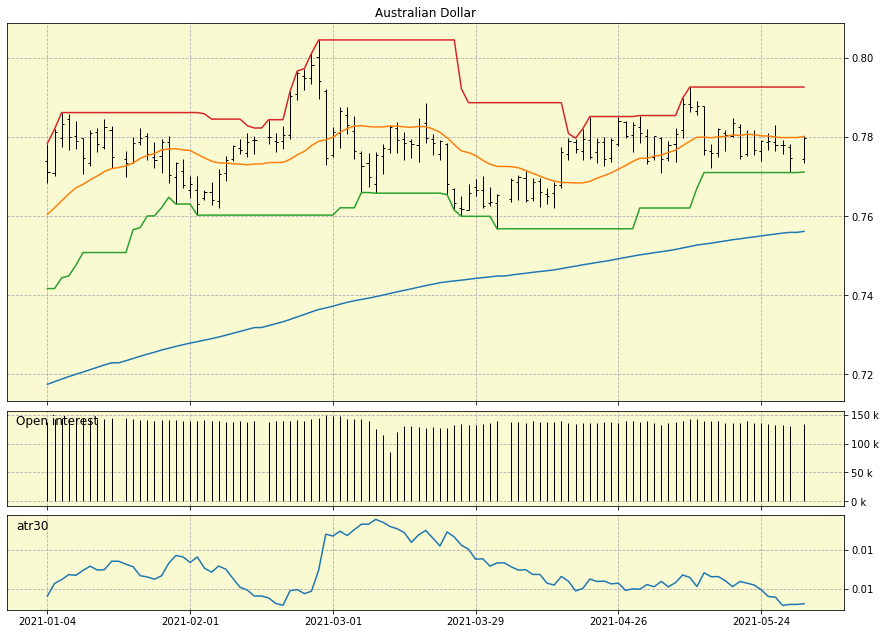

In [64]:
fig

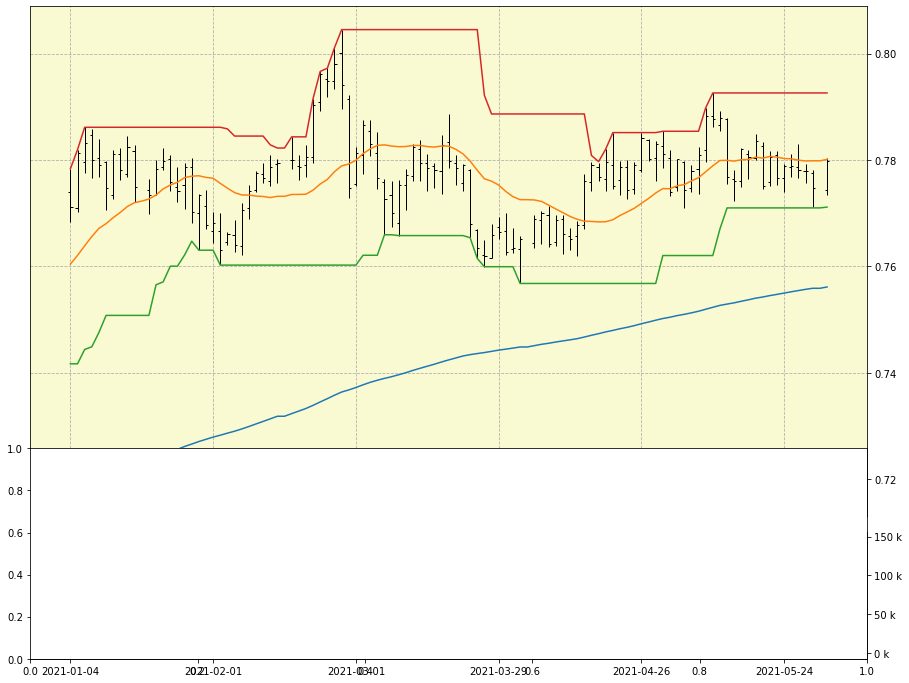

In [31]:
fig

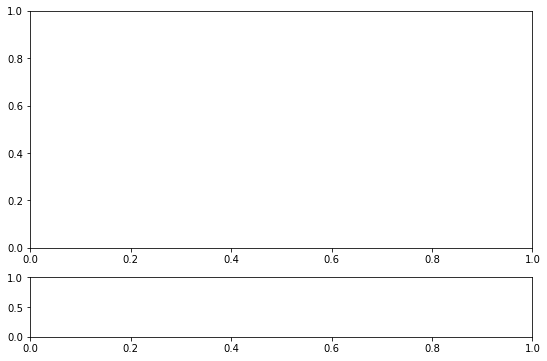

In [84]:
fig, (ax) = plt.subplots(2,1,figsize=(9,6), gridspec_kw = {'height_ratios':[4,1]})

In [85]:
fig.add_gridspec(3,1)

GridSpec(3, 1)

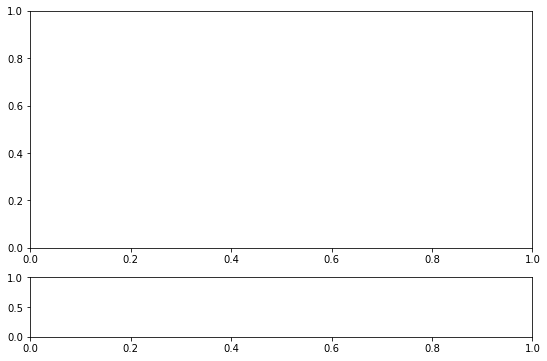

In [86]:
fig

In [87]:
ax2 = fig.add_subplot(313)

In [97]:
[1]*5+[2,2]

[1, 1, 1, 1, 1, 2, 2]

In [89]:
ax2.get_gridspec()

GridSpec(3, 1)

In [92]:
ax0 = ax[0]

In [95]:
ax0.grid?

In [170]:
q['AD'] = df

In [171]:
q['AD'].attrs

{}

In [177]:
with open('backtesting/system1.yaml', 'r', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'tf05', 'description': '시스템 설명', 'quotes_style': 'bo', 'instruments': None, 'from_date': '2000-01-01', 'to_date': None, 'principal': 100000, 'heat_system': 0.05, 'heat_sector': None, 'heat_trade': 0.01, 'max_lots': 3, 'commission': 2.99, 'skid': 0.25, 'indicators': [['EMA', 'window=200'], ['MA', 'window=20'], ['ATR', 'window=30'], ['MIN', 'window=20'], ['MAX', 'window=20']], 'entry_rule': {'long': '((ma20<ema200) | (ma20<=ema200)) & (ma20<=max20)', 'short': None}, 'exit_rule': {'long': 'ma20>ema200', 'short': None}, 'stop_rule': {'long': 'min20 > close', 'short': 'max20 > high'}}


In [178]:
txt = system1['in']

In [179]:
txt

[['EMA', 'window=200'],
 ['MA', 'window=20'],
 ['ATR', 'window=30'],
 ['MIN', 'window=20'],
 ['MAX', 'window=20']]